In this file I will be applying the rotated 2D flat topped Gaussian that I worked on in the file MAKING_GAUSSIAN_MODEL.

I will do it tilted and not tilted to compare the two and ensure the tilting is working!

In [1]:
from mpl_toolkits.mplot3d import Axes3D

from scipy.interpolate import griddata

In [2]:
%run run_all_intro_stuff.py

# Circular Model

For the circular model $\sigma_x = \sigma_y$. In the function $\texttt{gaussian_2d_flat_topped_tilted_model}$ the values of $\sigma$ are dependent on \texttt{BMAJ_pix} and \texttt{BMIN_pix} so I will just feed the function \texttt{BMAJ_pix} for both and not use BMIN_pix

In [3]:
theta_rad_circ = major_angle_rad_cartesian

phi_circ = 3

In [4]:
GaussianUniformRatios_circ, GaussianAzimuthalRatios_circ, X_rot_circ, Y_rot_circ = gaussian_2d_flat_topped_tilted_model(nx, ny, 
                                                                                                    theta_rad_circ, phi_circ, 
                                                                                                    BMAJ_pix, BMAJ_pix, 
                                                                                                    RA_centre_pix, Dec_centre_pix)

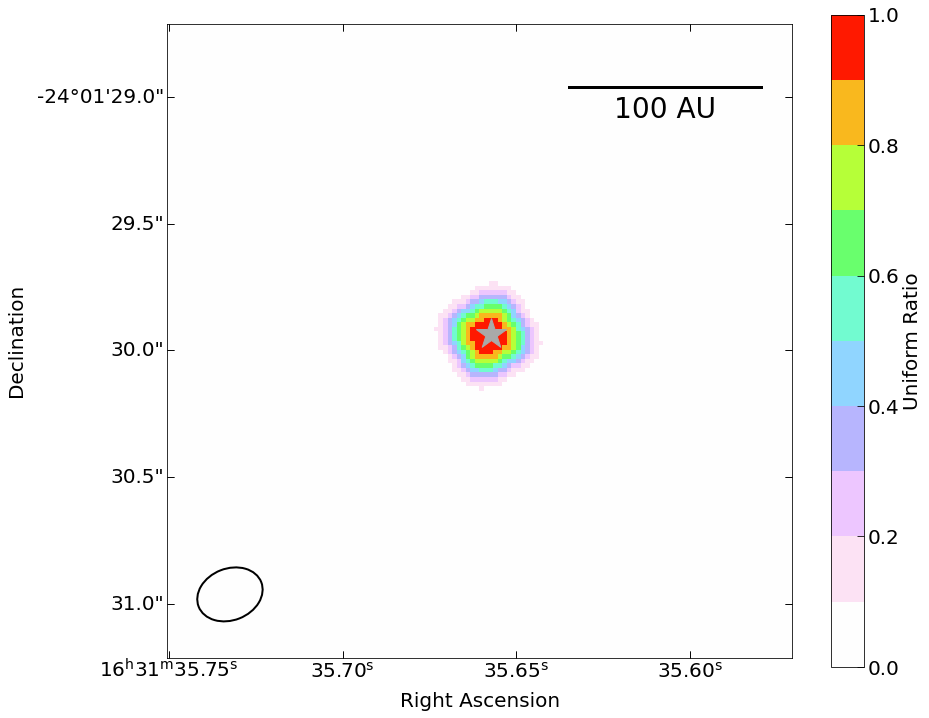

In [5]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, 
                                      GaussianUniformRatios_circ, 'Uniform Ratio', 
                                      soft_colormap_10, #soft_colormap_v2, 
                                      normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                      text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                      max_length_pix, reference_fraction)



ax.scatter(RA_centre_pix, Dec_centre_pix, color = 'darkgray', s = 1000, marker = '*')

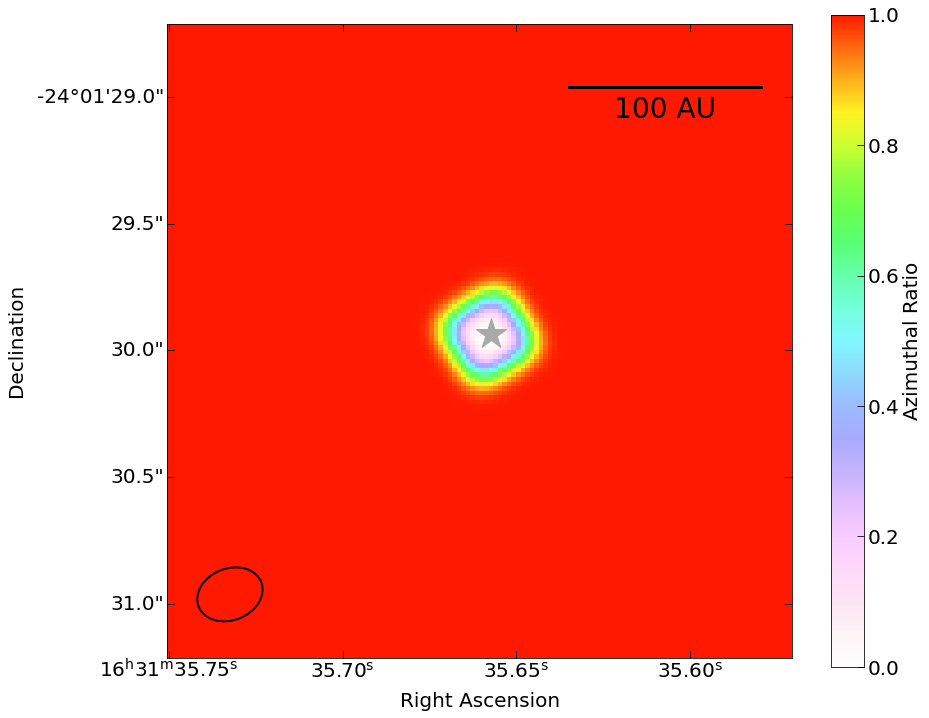

In [6]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianAzimuthalRatios_circ, 'Azimuthal Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

ax.scatter(RA_centre_pix, Dec_centre_pix, color = 'darkgray', s = 1000, marker = '*')

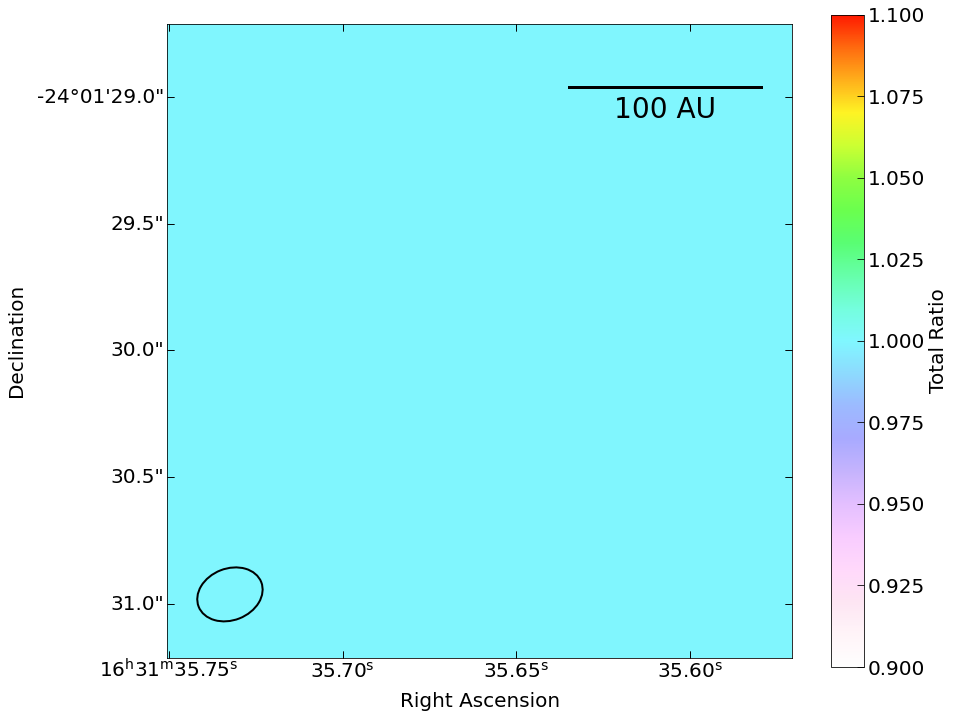

In [7]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianUniformRatios_circ + GaussianAzimuthalRatios_circ, 'Total Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

# Non circular - set constant phi and sigmas

In [8]:
theta_rad = major_angle_rad_cartesian

phi = 3

In [9]:
GaussianUniformRatios, GaussianAzimuthalRatios, X_rot, Y_rot = gaussian_2d_flat_topped_tilted_model(nx, ny, 
                                                                                                    theta_rad, phi, 
                                                                                                    BMAJ_pix, BMAJ_pix, 
                                                                                                    RA_centre_pix, Dec_centre_pix)

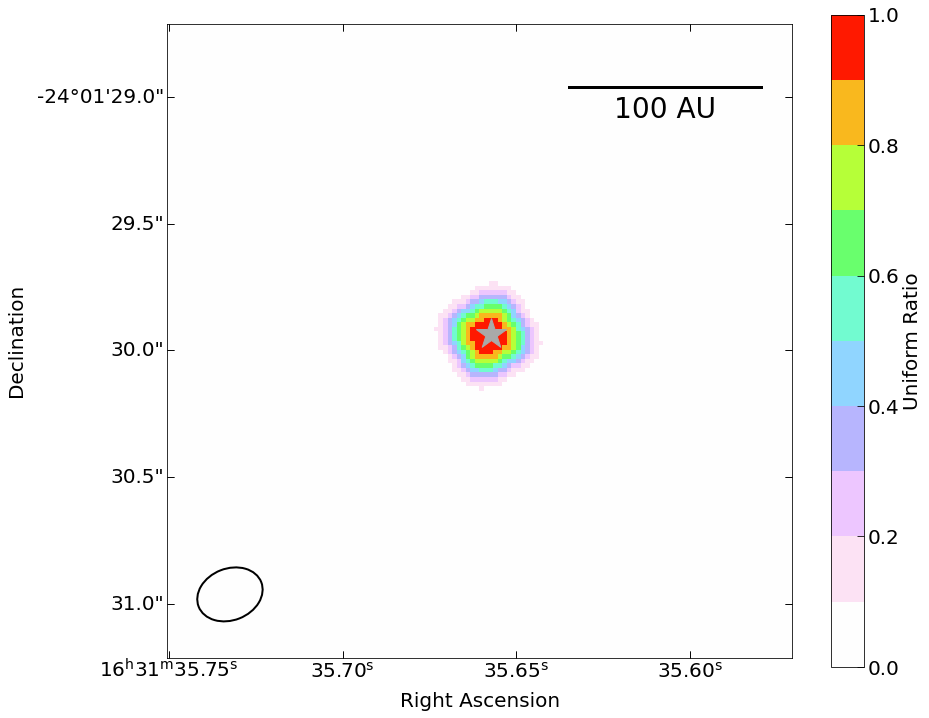

In [10]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, 
                                      GaussianUniformRatios, 'Uniform Ratio', 
                                      soft_colormap_10, #soft_colormap_v2, 
                                      normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                                      xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                                      text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                                      BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                                      max_length_pix, reference_fraction)



ax.scatter(RA_centre_pix, Dec_centre_pix, color = 'darkgray', s = 1000, marker = '*')

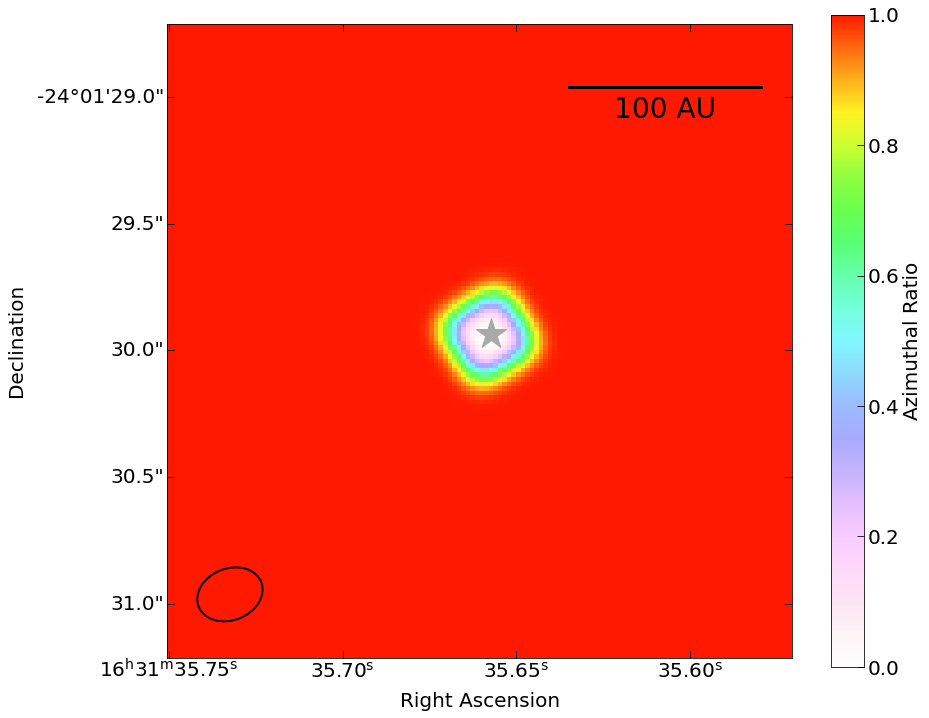

In [11]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianAzimuthalRatios, 'Azimuthal Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

ax.scatter(RA_centre_pix, Dec_centre_pix, color = 'darkgray', s = 1000, marker = '*')

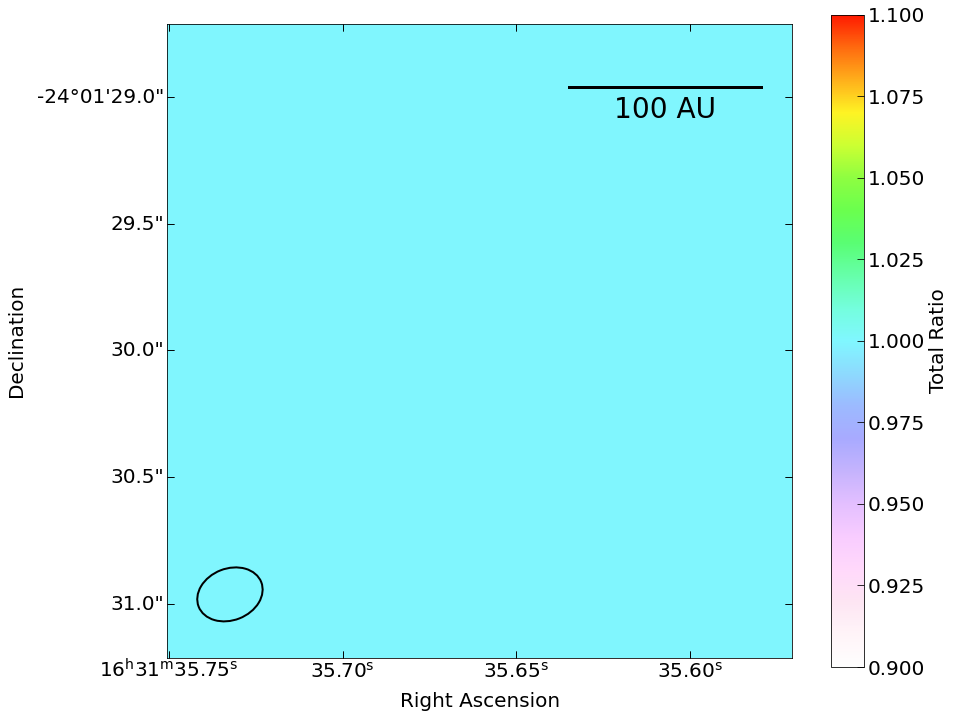

In [12]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, GaussianUniformRatios + GaussianAzimuthalRatios, 'Total Ratio',
                           soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

## Now resample Q, U and vector angle

In [13]:
PA_grid_gaussian_rad_astronomy, StokesQ_grid_gaussian, StokesU_grid_gaussian, vector_data_gaussian_cartesian, vector_gaussian_angle_rad_astronomy = mix_StokesQU_and_generate_vectors(GaussianUniformRatios, GaussianAzimuthalRatios, 
                                                                                                                                                                            StokesQ_grid_100Uniform, 
                                                                                                                                                                            StokesU_grid_100Uniform,
                                                                                                                                                                            StokesQ_grid_100Azimuthal, 
                                                                                                                                                                            StokesU_grid_100Azimuthal,
                                                                                                                                                                              ny, nx, 
                                                                                                                                                                              step, vector_length_pix_const, 
                                                                                                                                                                              StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                                                                                                              calculated_polarized_intensity, PolarizedIntensity_err_data_2d_mJy,
                                                                                                                                                                              PolarizationAngle_err_data_2d_deg)

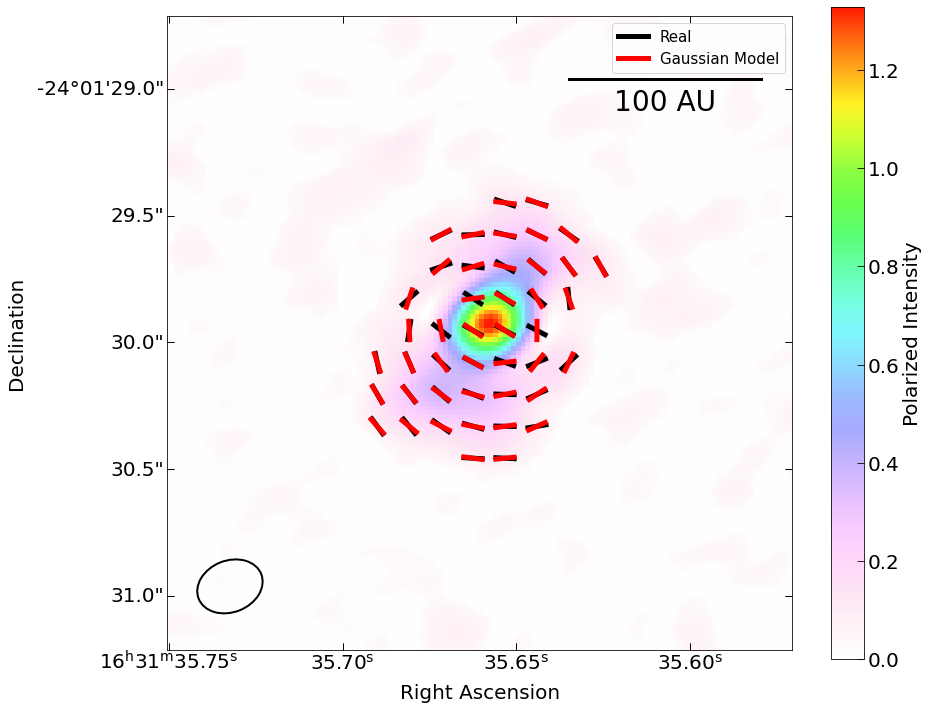

In [14]:
fig, ax = create_base_plot_not_stokes(StokesI_wcs, PolarizedIntensity_data_2d_mJy, 'Polarized Intensity',  soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)


first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)

In [15]:
observed = vector_gaussian_angle_rad_astronomy
expected = vector_angle_actual_same_length_astronomy

chi_squared  = calculate_chi_squared_v2(observed, expected)
chi_squared

19.35838029268953

# Changing $\phi$, $\sigma_x$ and $\sigma_y$

In [16]:
phi_values = [2, 3, 4, 5]

chi_values = []
vector_angles = []
all_values = []


chi_values_const_phi = []
chi_values_const_BMAJ = []
chi_values_const_BMIN = []

In [17]:
BMAJ_pix_values = np.int(BMAJ_pix) + np.array([-1, 0, 1, 2])
BMIN_pix_values = np.int(BMIN_pix) + np.array([-1, 0, 1, 2])


print('The BMAJ pix values we will test are:', BMAJ_pix_values)

print('The BMIN pix values we will test are:', BMIN_pix_values)

The BMAJ pix values we will test are: [13 14 15 16]
The BMIN pix values we will test are: [10 11 12 13]


/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_33147/1812869460.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  BMAJ_pix_values = np.int(BMAJ_pix) + np.array([-1, 0, 1, 2])
/var/folders/p9/hcwv87bd7lxfdw1nmx4wt8d00000gn/T/ipykernel_33147/1812869460.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you 

In [78]:
# Dictionary to store results
results = {}

for phi in phi_values: 
    
    
    for BMAJ_pix in BMAJ_pix_values:
        for BMIN_pix in BMIN_pix_values:
            
            # Run the gaussian model function
            # --------------------------------------------------------------------------------------------------------------------------------------------
            GaussianUniformRatios, GaussianAzimuthalRatios, _, _ = gaussian_2d_flat_topped_tilted_model(nx, ny, 
                                                                                                        theta_rad, phi, 
                                                                                                        BMAJ_pix, BMAJ_pix, 
                                                                                                        RA_centre_pix, Dec_centre_pix)
            # --------------------------------------------------------------------------------------------------------------------------------------------
            
            


            # Recovere the Q, U and vector angle
            # --------------------------------------------------------------------------------------------------------------------------------------------
            _, _, _, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors(GaussianUniformRatios, GaussianAzimuthalRatios, 
                                                                                     StokesQ_grid_100Uniform, 
                                                                                     StokesU_grid_100Uniform,
                                                                                     StokesQ_grid_100Azimuthal, 
                                                                                     StokesU_grid_100Azimuthal,
                                                                                     ny, nx, 
                                                                                     step, vector_length_pix_const, 
                                                                                     StokesI_data_2d_mJy, StokesIerr_data_2d_mJy,
                                                                                     calculated_polarized_intensity, 
                                                                                     PolarizedIntensity_err_data_2d_mJy,
                                                                                     PolarizationAngle_err_data_2d_deg)
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
            # Create a key for the dictionary based on the values
            value_str = f"{int(phi)}_{int(BMAJ_pix)}_{int(BMIN_pix)}"  
    
            # Save the results in the dictionary
            results[f"vectors_data_{value_str}"] = vectors_data
            
            all_values.append((phi, BMAJ_pix, BMIN_pix))
            # ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
           
    
    
            # Calculate and append chi squared 
            # --------------------------------------------------------------
            observed = vectors_angle
            expected = vector_angle_actual_same_length_astronomy

            chi_squared = calculate_chi_squared_v2(observed, expected)
        
            chi_values.append(chi_squared)
            # --------------------------------------------------------------
        

In [61]:
# # Dictionary to store results for each constant phi, indexed by 0, 1, 2, 3
# const_phi_data = {}

# # Iterate over the first 4 phi values
# for i, phi in enumerate(phi_values[:4]):  # This will go over the first 4 phi values
    
#     # Initialize lists for BMAJ, BMIN, and chi values for this phi
#     BMAJ_values = []
#     BMIN_values = []
#     chi_values_for_phi = []
    
#     # Iterate over BMAJ and BMIN values
#     for BMAJ_pix in BMAJ_pix_values:
#         for BMIN_pix in BMIN_pix_values:
            
#             # Run the gaussian model function
#             GaussianUniformRatios, GaussianAzimuthalRatios, _, _ = gaussian_2d_flat_topped_tilted_model(
#                 nx, ny, theta_rad, phi, BMAJ_pix, BMAJ_pix, RA_centre_pix, Dec_centre_pix)
            
#             # Recover the Q, U and vector angle
#             _, _, _, vectors_data, vectors_angle = mix_StokesQU_and_generate_vectors(
#                 GaussianUniformRatios, GaussianAzimuthalRatios, StokesQ_grid_100Uniform, StokesU_grid_100Uniform,
#                 StokesQ_grid_100Azimuthal, StokesU_grid_100Azimuthal, ny, nx, step, vector_length_pix_const, 
#                 StokesI_data_2d_mJy, StokesIerr_data_2d_mJy, calculated_polarized_intensity, 
#                 PolarizedIntensity_err_data_2d_mJy, PolarizationAngle_err_data_2d_deg)
            
#             # Calculate and append chi squared 
#             observed = vectors_angle
#             expected = vector_angle_actual_same_length_astronomy
#             chi_squared = calculate_chi_squared_v2(observed, expected)
            
#             # Append the values to their respective lists
#             BMAJ_values.append(BMAJ_pix)
#             BMIN_values.append(BMIN_pix)
#             chi_values_for_phi.append(chi_squared)
    
#     # Store the results for this phi in the const_phi_data dictionary, indexed by i
#     const_phi_data[i] = {
#         'phi_value': phi,  # Store the value of phi
#         'BMAJ': BMAJ_values,
#         'BMIN': BMIN_values,
#         'chi_values': chi_values_for_phi
#     }

# # Now you can access the data like this:
# # For index 0 (phi = phi_values[0])
# phi_0_data = const_phi_data[0]

# # Get the BMAJ, BMIN, chi values, and phi_value for index 0
# BMAJ_for_phi_0 = phi_0_data['BMAJ']
# BMIN_for_phi_0 = phi_0_data['BMIN']
# chi_values_for_phi_0 = phi_0_data['chi_values']
# phi_value_0 = phi_0_data['phi_value']

# print(f"BMAJ for phi = {phi_value_0}: {BMAJ_for_phi_0}")
# print(f"BMIN for phi = {phi_value_0}: {BMIN_for_phi_0}")
# print(f"Chi values for phi = {phi_value_0}: {chi_values_for_phi_0}")


BMAJ for phi = 2: [13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]
BMIN for phi = 2: [10, 11, 12, 13, 10, 11, 12, 13, 10, 11, 12, 13, 10, 11, 12, 13]
Chi values for phi = 2: [19.365582472348393, 19.365582472348393, 19.365582472348393, 19.365582472348393, 16.024147588719718, 16.024147588719718, 16.024147588719718, 16.024147588719718, 15.622794480384742, 15.622794480384742, 15.622794480384742, 15.622794480384742, 15.23711551891829, 15.23711551891829, 15.23711551891829, 15.23711551891829]


In [20]:
# Find the index of the minimum chi-squared value
min_index = chi_values.index(min(chi_values))

best_phi, best_BMAJ, best_BMIN = all_values[min_index]

In [21]:
# Print the results
print(f'The lowest chi-squared value is for phi = {best_phi:.2f}, BMAJ = {best_BMAJ:.2f}, and BMIN = {best_BMIN:.2f}: χ² = {chi_values[min_index]:.3f}')

The lowest chi-squared value is for phi = 2.00, BMAJ = 16.00, and BMIN = 10.00: χ² = 15.237


In [22]:
# for i in range(len(flat_values)):
    
#     print(f'flat_major = {flat_values[i][0]} and flat_minor = {flat_values[i][1]}: xi^2 = {chi_values[i]:.3f}')
      
# # Print the one with the lowest chi-squared value
# print(f'\nThe lowest chi-squared value is for flat_major = {flat_values[min_index][0]} and flat_minor = {flat_values[min_index][1]}: xi^2 = {chi_values[min_index]:.3f}')

In [23]:
# Access the best vector data from the dictionary
best_key = f"vectors_data_{int(best_phi)}_{int(best_BMAJ)}_{int(best_BMIN)}"
vector_data_gaussian_best = results[best_key]

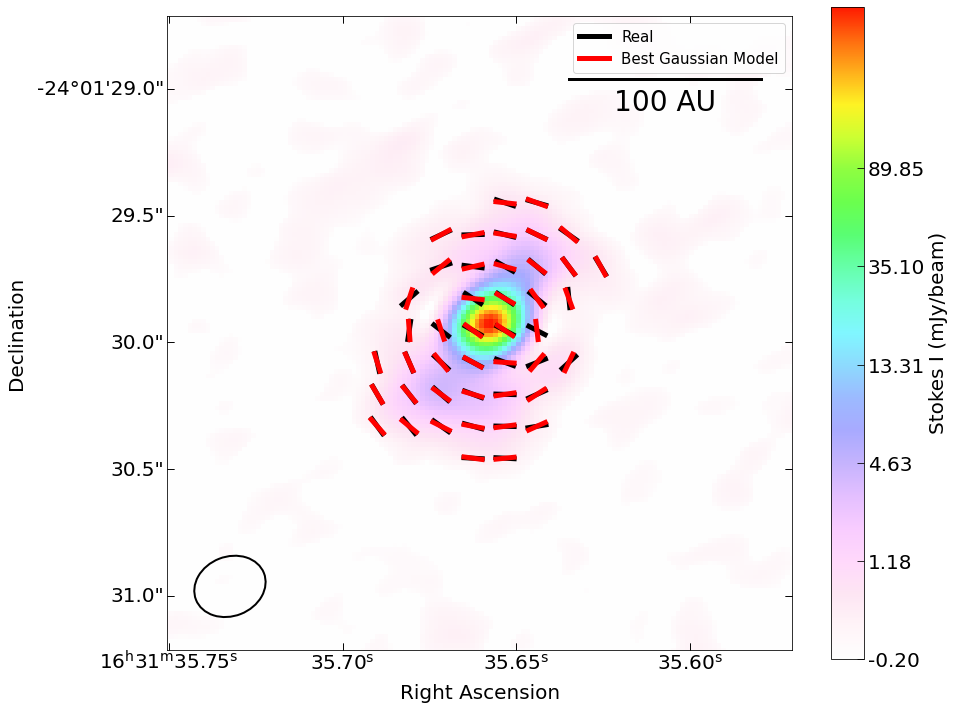

In [24]:
fig, ax = create_base_plot(StokesI_wcs, PolarizedIntensity_data_2d_mJy, soft_colormap_v2, 
                           normalized_cbar_ticks, StokesI_unstretched_cbar_ticks, 
                           xmin, xmax, ymin, ymax, reference_length_pix, reference_length_AU,
                           text_fs, axis_label_fs, axis_num_fs, cbar_fs,
                           BMAJ_pix, BMIN_pix, BPA_deg_cartesian, 
                           max_length_pix, reference_fraction)

first_real = True
for row in vector_data_actual_same_length_cartesian:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='black', lw=5, 
            label='Real' if first_real else None)
    first_real = False
    
    
# Add vector plots, ensuring the label appears only once
first_best_model = True
for row in vector_data_gaussian_best:
    ax.plot([row[0], row[1]], [row[2], row[3]], color='red', lw=5, 
            label='Best Gaussian Model' if first_best_model else None)
    first_best_model = False

ax.legend(fontsize = legend_text_fs)

## Testing 2D Contour

In [74]:
delta = 1
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [75]:
X

array([[-3., -2., -1.,  0.,  1.,  2.],
       [-3., -2., -1.,  0.,  1.,  2.],
       [-3., -2., -1.,  0.,  1.,  2.],
       [-3., -2., -1.,  0.,  1.,  2.]])

In [76]:
Y

array([[-2., -2., -2., -2., -2., -2.],
       [-1., -1., -1., -1., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [77]:
Z

array([[ 4.52063104e-06,  6.70894796e-04,  1.34713733e-02,
         3.65404779e-02,  1.32290744e-02,  5.80125396e-04],
       [ 9.07957372e-05,  1.34713733e-02,  2.69999641e-01,
         7.22282988e-01,  2.34039289e-01,  0.00000000e+00],
       [ 2.46736809e-04,  3.65404779e-02,  7.22282988e-01,
         1.72932943e+00,  0.00000000e+00, -2.34039289e-01],
       [ 9.05747892e-05,  1.32290744e-02,  2.34039289e-01,
         0.00000000e+00, -1.72932943e+00, -7.22282988e-01]])

In [26]:
print(f'The length of X is {len(X)}')
print(f'The length of Y is {len(Y)}')
print(f'The length of Z is {len(Z)}')

print(' ')

print(f'The shape of X is {X.shape}')
print(f'The shape of Y is {Y.shape}')
print(f'The shape of Z is {Z.shape}')

The length of X is 160
The length of Y is 160
The length of Z is 160
 
The shape of X is (160, 240)
The shape of Y is (160, 240)
The shape of Z is (160, 240)


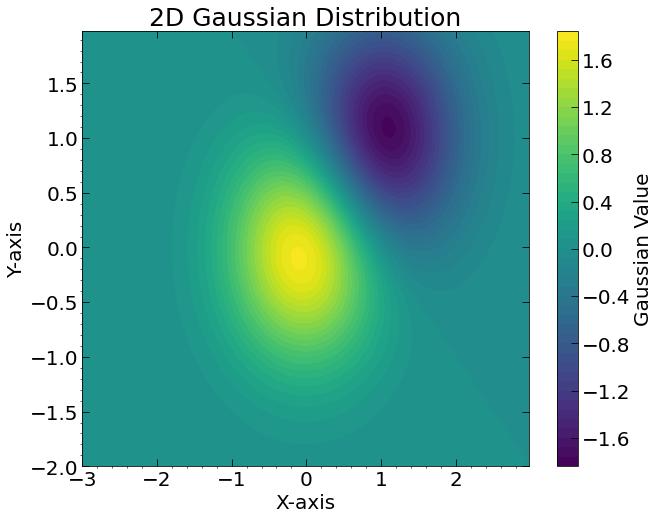

In [27]:
# Plotting the result
fig, ax = plt.subplots(figsize=(10, 8))

# Contour plot
contour = ax.contourf(X, Y, Z, 50, cmap='viridis')

# Add colorbar and set properties
cbar = fig.colorbar(contour, ax=ax, label='Gaussian Value')
cbar.set_label('Gaussian Value', fontsize=cbar_fs)
cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
cbar.ax.tick_params(which='minor', length=4, direction="in")

# Set title and labels
ax.set_title('2D Gaussian Distribution', fontsize=title_fs)
ax.set_xlabel('X-axis', fontsize=axis_label_fs)
ax.set_ylabel('Y-axis', fontsize=axis_label_fs)

# Adjust ticks
ax.minorticks_on()
ax.tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
ax.tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.show()


## Look at 2D Contours

In [28]:
# Convert stored values into NumPy arrays
phi_vals, BMAJ_vals, BMIN_vals = zip(*all_values)
phi_vals = np.array(phi_vals)
BMAJ_vals = np.array(BMAJ_vals)
BMIN_vals = np.array(BMIN_vals)
chi_values = np.array(chi_values)

In [29]:
print(f'The length of phi_vals is {len(phi_vals)}')
print(f'The length of BMAJ_vals is {len(BMAJ_vals)}')
print(f'The length of BMIN_vals is {len(BMIN_vals)}')
print(f'The length of chi_values is {len(chi_values)}')

print(' ')

print(f'The shape of phi_vals is {phi_vals.shape}')
print(f'The shape of BMAJ_vals is {BMAJ_vals.shape}')
print(f'The shape of BMIN_vals is {BMIN_vals.shape}')
print(f'The shape of chi_values is {chi_values.shape}')

The length of phi_vals is 64
The length of BMAJ_vals is 64
The length of BMIN_vals is 64
The length of chi_values is 64
 
The shape of phi_vals is (64,)
The shape of BMAJ_vals is (64,)
The shape of BMIN_vals is (64,)
The shape of chi_values is (64,)


In [30]:
phi_1,  BMAJ_1 = np.meshgrid(phi_vals,  BMAJ_vals)
phi_2,  BMIN_2 = np.meshgrid(phi_vals,  BMIN_vals)
BMIN_3, BMAJ_3 = np.meshgrid(BMIN_vals, BMAJ_vals)

In [31]:
print(f'The length of 1 is : phi_1 = {len(phi_1)} and BMAJ_1 = {len(BMAJ_1)}')
print(f'The length of 2 is : phi_2 = {len(phi_2)} and BMIN_2 = {len(BMIN_2)}')
print(f'The length of 3 is : BMIN_3 = {len(BMIN_3)} and BMAJ_3 = {len(BMAJ_3)}')

print(' ')

print(f'The shape of 1 is : phi_1 = {phi_1.shape} and BMAJ_1 = {BMAJ_1.shape}')
print(f'The shape of 2 is : phi_2 = {phi_2.shape} and BMIN_2 = {BMIN_2.shape}')
print(f'The shape of 3 is : BMIN_3 = {BMIN_3.shape} and BMAJ_3 = {BMAJ_3.shape}')

The length of 1 is : phi_1 = 64 and BMAJ_1 = 64
The length of 2 is : phi_2 = 64 and BMIN_2 = 64
The length of 3 is : BMIN_3 = 64 and BMAJ_3 = 64
 
The shape of 1 is : phi_1 = (64, 64) and BMAJ_1 = (64, 64)
The shape of 2 is : phi_2 = (64, 64) and BMIN_2 = (64, 64)
The shape of 3 is : BMIN_3 = (64, 64) and BMAJ_3 = (64, 64)


In [36]:
print(f'The length of chi_values_const_phi is : {len(chi_values_const_phi)}')
print(f'The length of chi_values_const_BMAJ is : {len(chi_values_const_BMAJ)}')
print(f'The length of chi_values_const_phi is : {len(chi_values_const_phi)}')

print(' ')

print(f'The shape of chi_values_const_phi is : {chi_values_const_phi.shape}')
print(f'The shape of chi_values_const_BMAJi is : {chi_values_const_BMAJ.shape}')
print(f'The shape of chi_values_const_BMIN is : {chi_values_const_BMIN.shape}')

The length of chi_values_const_phi is : 64
The length of chi_values_const_BMAJ is : 64
The length of chi_values_const_phi is : 64
 


AttributeError: 'list' object has no attribute 'shape'

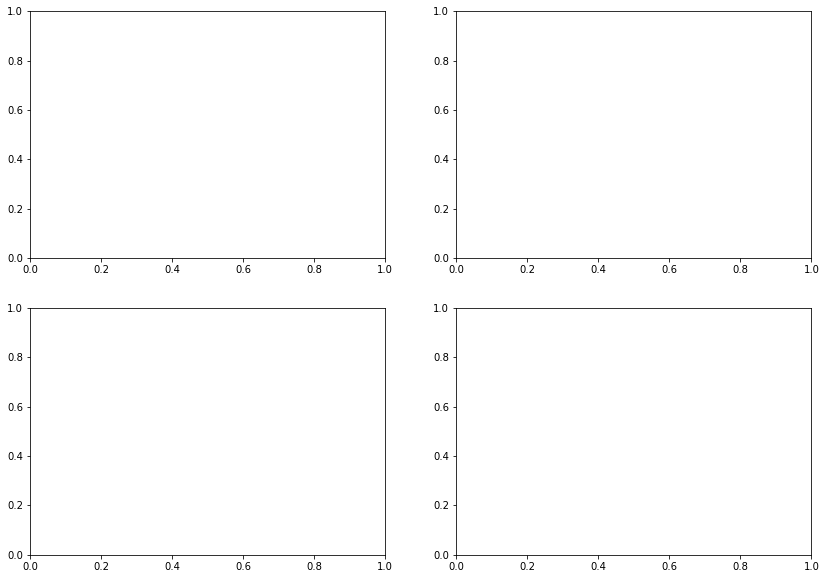

In [39]:
# Plotting the result
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Contour plots
contour_0 = ax[0].contourf(phi_1, BMAJ_1, chi_values_2d, 50, cmap='viridis')
contour_1 = ax[1].contourf(phi_2, BMIN_2, chi_values_2d, 50, cmap='viridis')
contour_2 = ax[2].contourf(BMIN_3, BMAJ_3, chi_values_2d, 50, cmap='viridis')

# Add colorbar to each subplot and set properties
cbar_0 = fig.colorbar(contour_0, ax=ax[0], orientation='vertical')
cbar_0.set_label('Chi Value', fontsize=cbar_fs)
cbar_0.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
cbar_0.ax.tick_params(which='minor', length=4, direction="in")

cbar_1 = fig.colorbar(contour_1, ax=ax[1], orientation='vertical')
cbar_1.set_label('Chi Value', fontsize=cbar_fs)
cbar_1.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
cbar_1.ax.tick_params(which='minor', length=4, direction="in")

cbar_2 = fig.colorbar(contour_2, ax=ax[2], orientation='vertical')
cbar_2.set_label('Chi Value', fontsize=cbar_fs)
cbar_2.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
cbar_2.ax.tick_params(which='minor', length=4, direction="in")

# Set titles, labels, and axis ticks for each subplot
ax[0].set_xlabel(r'$\phi$', fontsize=axis_label_fs)
ax[0].set_ylabel('BMAJ', fontsize=axis_label_fs)

ax[1].set_xlabel(r'$\phi$', fontsize=axis_label_fs)
ax[1].set_ylabel('BMIN', fontsize=axis_label_fs)

ax[2].set_xlabel(r'BMIN', fontsize=axis_label_fs)
ax[2].set_ylabel('BMAJ', fontsize=axis_label_fs)

# Adjust ticks for all subplots
for i in range(3):
    ax[i].minorticks_on()
    ax[i].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[i].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)

plt.tight_layout()
plt.show()





### Contours of BMAJ and BMIN with constant $\phi$

In [ ]:
phi_1,  BMAJ_1 = np.meshgrid(phi_vals,  BMAJ_vals)
phi_2,  BMIN_2 = np.meshgrid(phi_vals,  BMIN_vals)
BMIN_3, BMAJ_3 = np.meshgrid(BMIN_vals, BMAJ_vals)

BMAJ_const_phi, BMIN_const_phi

In [68]:
# Now you can access the data like this:
# For index 0 (phi = phi_values[0])
phi_0_data = const_phi_data[0]

# Get the BMAJ, BMIN, chi values, and phi_value for index 0
BMAJ_for_phi_0 = phi_0_data['BMAJ']
BMIN_for_phi_0 = phi_0_data['BMIN']
chi_values_for_phi_0 = phi_0_data['chi_values']
phi_value_0 = phi_0_data['phi_value']

print(f"BMAJ for phi = {phi_value_0}: {BMAJ_for_phi_0}")
print(f"BMIN for phi = {phi_value_0}: {BMIN_for_phi_0}")
print(f"Chi values for phi = {phi_value_0}: {chi_values_for_phi_0}")

BMAJ for phi = 2: [13, 13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16]
BMIN for phi = 2: [10, 11, 12, 13, 10, 11, 12, 13, 10, 11, 12, 13, 10, 11, 12, 13]
Chi values for phi = 2: [19.365582472348393, 19.365582472348393, 19.365582472348393, 19.365582472348393, 16.024147588719718, 16.024147588719718, 16.024147588719718, 16.024147588719718, 15.622794480384742, 15.622794480384742, 15.622794480384742, 15.622794480384742, 15.23711551891829, 15.23711551891829, 15.23711551891829, 15.23711551891829]


In [69]:
BMAJ, BMIN = np.meshgrid(BMAJ_for_phi_0[:4], BMIN_for_phi_0[:4])

In [70]:
BMAJ

array([[13, 13, 13, 13],
       [13, 13, 13, 13],
       [13, 13, 13, 13],
       [13, 13, 13, 13]])

ValueError: cannot reshape array of size 16 into shape (16,16)

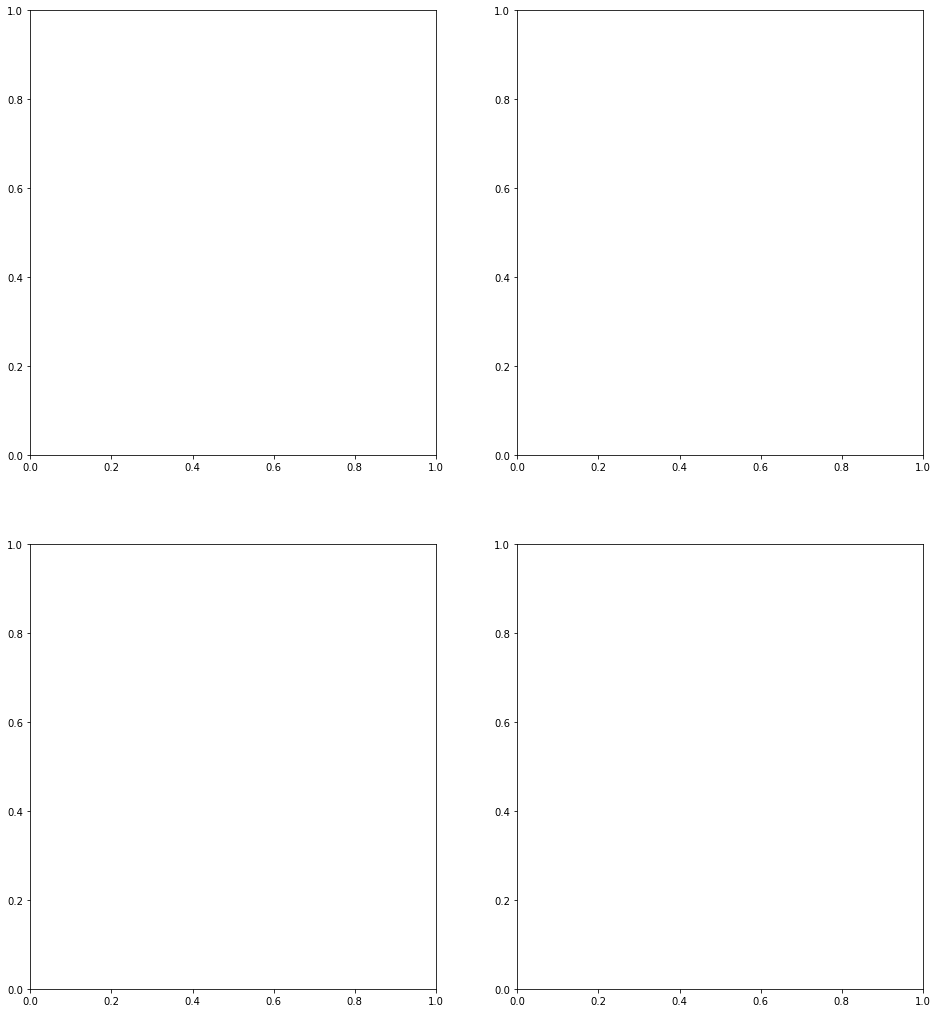

In [67]:
# Plotting the result
fig, ax = plt.subplots(2, 2, figsize=(16, 18))

# Assuming phi_values is a list or array with at least 4 elements
for i, phi_const in enumerate(phi_values[:4]):  # Loop over the first 4 values of phi
    
    
    # Now you can access the data like this:
    phi_i_data = const_phi_data[i]

    # Get the BMAJ, BMIN, chi values, and phi_value for index 0
    BMAJ_values = phi_i_data['BMAJ']
    BMIN_values = phi_i_data['BMIN']
    chi_values = phi_i_data['chi_values']
    phi_value = phi_i_data['phi_value']
    
    BMAJ, BMIN = np.meshgrid(BMAJ_values, BMIN_values)
    chi_values = np.reshape(chi_values, (len(BMAJ_values), len(BMIN_values)))
    
    
    # Calculate the row and column position
    row = i // 2  # Determine the row (0 or 1)
    col = i % 2   # Determine the column (0 or 1)
    
    # Create the contour plot
    contour = ax[row, col].contourf(BMAJ_values, BMIN_values, chi_values, 50, cmap='viridis')
    
    # Add colorbar to each subplot and set properties
    cbar = fig.colorbar(contour, ax=ax[row, col], orientation='vertical')
    cbar.set_label('Chi Value', fontsize=cbar_fs)
    cbar.ax.tick_params(labelsize=axis_num_fs, which='major', length=7, direction="in")
    cbar.ax.tick_params(which='minor', length=4, direction="in")
    
    # Set the title
    ax[row, col].set_title(rf' $\phi$ = {phi_value}', fontsize=title_fs)  # Correct formatting with f-string
    
    # Set the x and y labels
    ax[row, col].set_xlabel('BMAJ (pixels)', fontsize=axis_label_fs)
    ax[row, col].set_ylabel('BMIN (pixels)', fontsize=axis_label_fs)

    # Set size of ticks and labels
    ax[row, col].minorticks_on()
    ax[row, col].tick_params(axis="x", which="major", direction="in", bottom=True, top=True, length=7, labelsize=axis_num_fs)
    ax[row, col].tick_params(axis="y", which="major", direction="in", left=True, right=True, length=7, labelsize=axis_num_fs)


### Contours of BMAJ and $\phi$ with constant BMAJ

### Contours of BMAJ and $\phi$ with constant BMIN

## 3D Contours

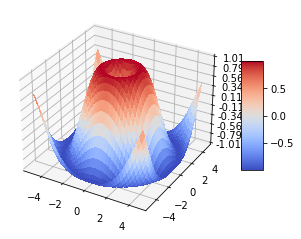

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()